In [1]:
import os, sys
# notebooks/에서 한 단계 위로 올라간 폴더를 PATH에 추가
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Map 시각화

Start: (np.int64(7), np.int64(3)) Goal: (7, 1)


(np.float64(-0.5), np.float64(287.5), np.float64(287.5), np.float64(-0.5))

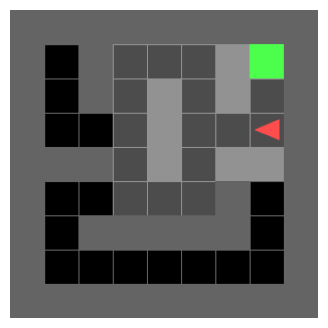

In [8]:
from env.custom_maze_env import CustomMazeEnv
import matplotlib.pyplot as plt

env = CustomMazeEnv(
    layout_id="a",
    goal_pos=(7,1),
    view_size=5,
    max_steps=250,
    tile_size=32,
    render_mode="rgb_array"    # ← 이 인자로 배열 반환이 활성화됩니다
)

obs, _ = env.reset(seed=0)
print("Start:", obs["position"], "Goal:", env.goal_pos)

img = env.render()           # 이제 numpy RGB array 반환!
plt.figure(figsize=(4,4))
plt.imshow(img)
plt.axis("off")


dict_keys(['view', 'timestep', 'position', 'image'])


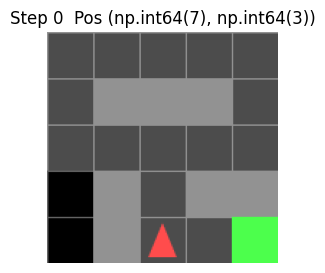

In [20]:
from minigrid.wrappers import RGBImgPartialObsWrapper, ImgObsWrapper

# ① Base env 생성 (render_mode="rgb_array" 필수)
base_env = CustomMazeEnv(
    layout_id="a",
    goal_pos=(7,1),
    view_size=5,
    max_steps=250,
    tile_size=32,
    render_mode="rgb_array"
)

# ② 1인칭 픽셀 obs 래핑 (이게 핵심)
env = RGBImgPartialObsWrapper(base_env, tile_size=32)

# ③ reset → obs 은 dict, 'image'에 egocentric RGB 뷰가 담겨 있음
obs, _ = env.reset(seed=0)
print(obs.keys())
# → dict_keys(['image', 'direction', 'mission', 'timestep', 'position', ...])

# ④ 1인칭 뷰 시각화
plt.figure(figsize=(3,3))
plt.imshow(obs["image"])
plt.title(f"Step {obs['timestep']}  Pos {obs['position']}")
plt.axis("off")
plt.show()

## 움직이기

In [ ]:
import matplotlib.pyplot as plt
import time

# 환경 생성 (render_mode="rgb_array"는 이미 custom env 에 설정되어 있습니다)
env = CustomMazeEnv(
    layout_id="a",
    goal_pos=(7,1),
    view_size=5,
    max_steps=250,
    tile_size=32,
    render_mode="rgb_array"
)

# 에피소드 시작
obs, _ = env.reset(seed=42)
done = False

while not done:
    # 1) 현재 1인칭 시점 이미지 출력
    plt.figure(figsize=(3,3))
    plt.imshow(obs["view"])
    plt.title(f"Step: {obs['timestep']}  Pos: {obs['position']}")
    plt.axis("off")
    plt.show()
    time.sleep(0.2)   # 화면 전환이 너무 빠르면 보기 힘들어서 잠깐 멈춤

    # 2) 랜덤 액션 선택 & 수행
    action = env.action_space.sample()
    obs, reward, terminated, truncated, _ = env.step(action)

    # 3) goal 도달 리워드 체크
    if reward > 0:
        print(f"🎉 Goal reached at step {obs['timestep']}  Position: {obs['position']}")
    done = terminated or truncated

# 마지막 전체 그리드(탑다운) 한 번 더 보기
full = env.render()   # (tile_size=32 RGB array)
plt.figure(figsize=(4,4))
plt.imshow(full)
plt.title("Final Top-Down View")
plt.axis("off")
plt.show()


In [22]:
import gymnasium as gym
import matplotlib.pyplot as plt
from minigrid.wrappers import FullyObsWrapper
env = gym.make("MiniGrid-LavaCrossingS11N5-v0")
obs, _ = env.reset()
obs['image'].shape
(7, 7, 3)
env_obs = FullyObsWrapper(env)
obs, _ = env_obs.reset()
obs['image'].shape
(11, 11, 3)

(11, 11, 3)

In [24]:
import gymnasium as gym
from minigrid.wrappers import ImgObsWrapper
env = gym.make("MiniGrid-Empty-5x5-v0")
obs, _ = env.reset()
obs.keys()
env = ImgObsWrapper(env)
obs, _ = env.reset()
obs.shape
(7, 7, 3)

(7, 7, 3)